In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import LassoCV,RidgeCV,Lasso,Ridge
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# Data Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# Model Evaluation
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Model Selection
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.model_selection import train_test_split

import warnings
def warn(*args,**kwargs):
  pass
warnings.warn = warn

In [2]:
from google.colab import drive


In [3]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/Quiz Ciencia de Datos Aplicada/insurance.csv')

#Dataset Visualization


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
stats_df = df.describe()
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
median,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [66]:
df.isna().sum() 
# df.isna().mean()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# check duplicated values
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [67]:
# Check for imbalance
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [68]:
# Check for imbalance
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [8]:
# drop duplicated values
df.drop_duplicates(inplace=True)

# Exploratory Data Analysis


In [9]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
def subplots(x,y):
    fig, axis = plt.subplots(x, y, figsize=(20,10))
    fig.tight_layout() # to fit
    return axis

In [11]:
def get_sum_precent(ax, y):
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width(), height, '{:1.1f}%'.format((height/df[y].sum())*100), ha="center", fontsize=15)

In [12]:
def get_count_precent(ax):
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()-0., height, '{:1.1f}%'.format((height/len(df))*100), ha="center", fontsize=15)

#Univariate analysis


In [13]:
def count_plot(features, df):
  axis = subplots(2, 3)
  index = 0
  for i in range(2):
      for j in range(3):
        if index == len(features):
          break
        ax = sns.countplot(ax=axis[i][j],x=features[index],data=df)
        get_count_precent(ax)
        index += 1

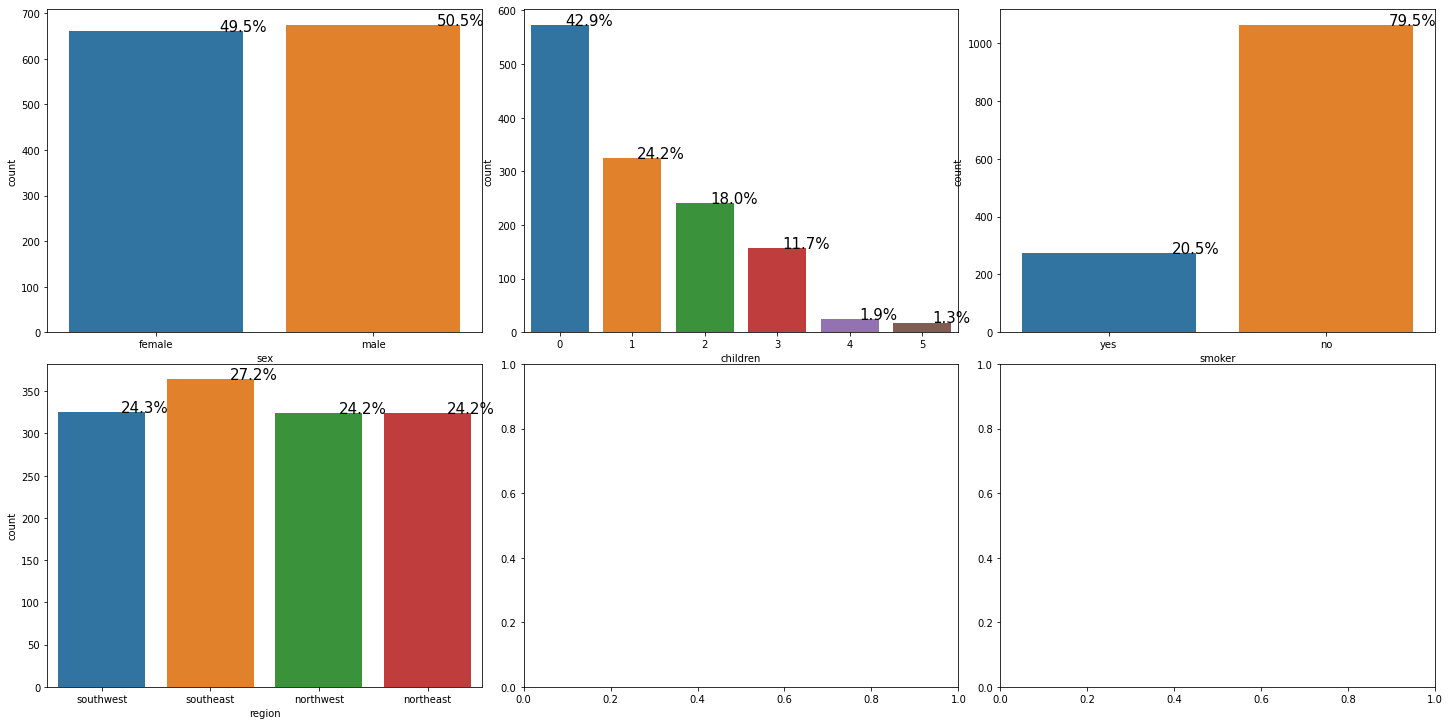

In [14]:
categorical_features = ['sex', 'children', 'smoker', 'region']
count_plot(categorical_features, df)

In [15]:
def box_plot(features, df):
  fig, axis = plt.subplots((len(features) // 3), 3, figsize=(20,10))  
  fig.tight_layout()
  for i in range((len(features) // 3)):
      for j in range(3):
        ax = sns.boxplot(ax=axis[j],x=features[j],data=df)

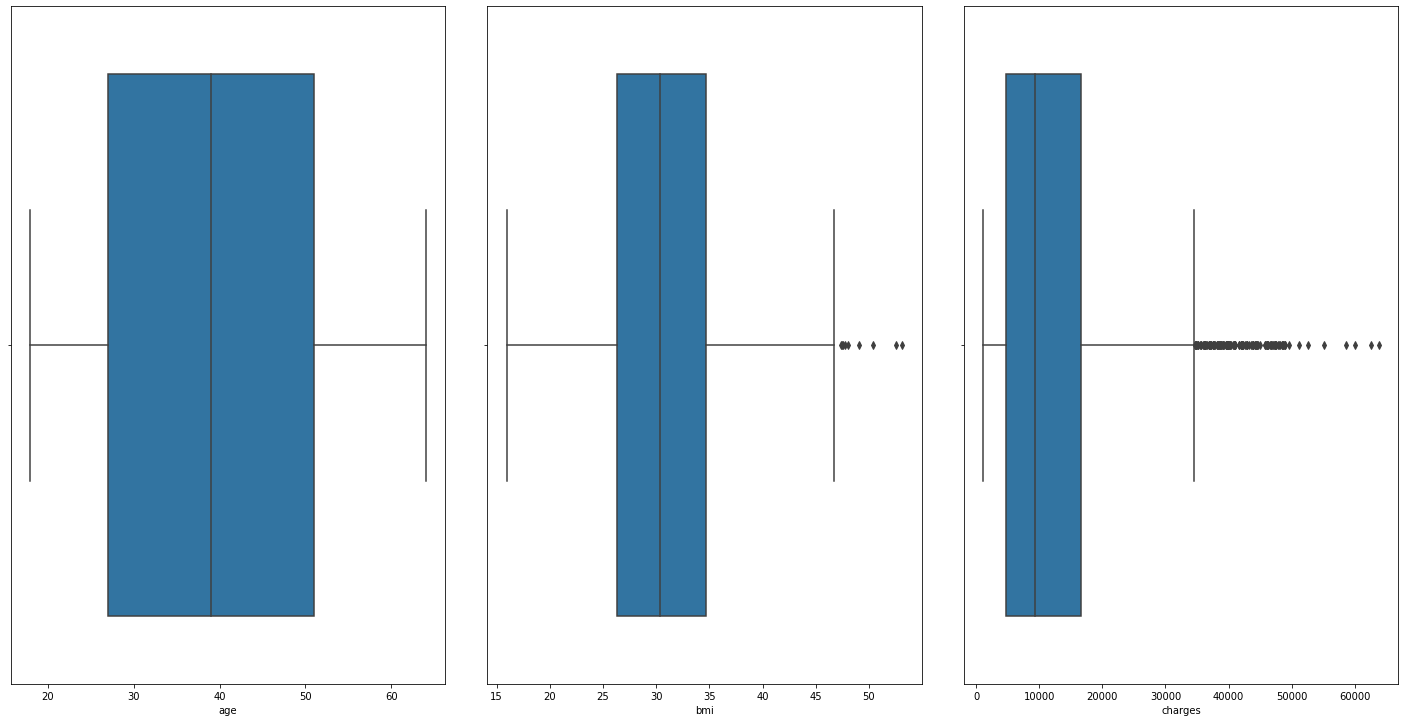

In [16]:
numerical_features = ['age', 'bmi', 'charges']
box_plot(numerical_features, df)

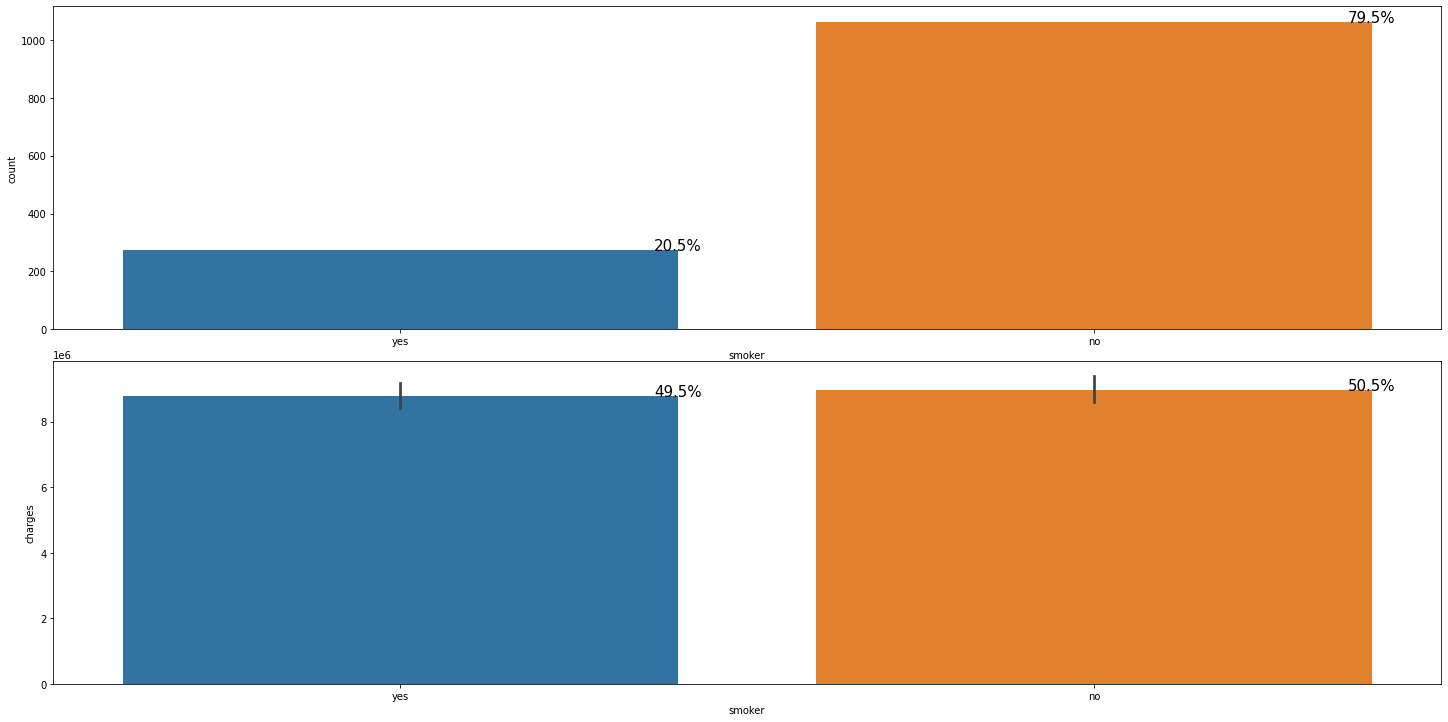

In [17]:
axis = subplots(2,1)
ax = sns.countplot(ax=axis[0],x='smoker',data=df)
get_count_precent(ax)
ax = sns.barplot(ax=axis[1],x='smoker', y='charges', data=df, estimator=sum)
get_sum_precent(ax, 'charges')

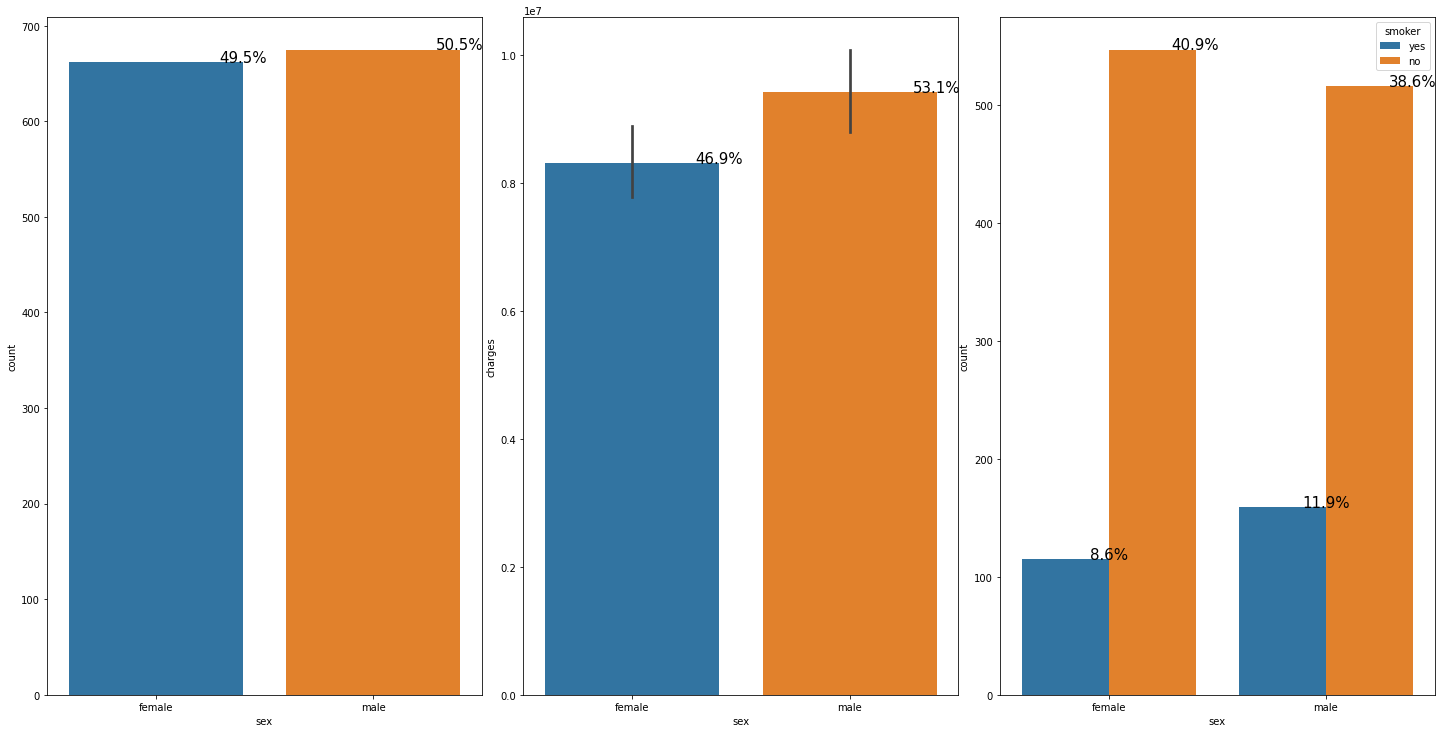

In [18]:
axis = subplots(1,3)
ax = sns.countplot(ax=axis[0], x='sex', data=df)
get_count_precent(ax)
ax = sns.barplot(ax=axis[1], x='sex', y='charges', data=df, estimator=sum)
get_sum_precent(ax, 'charges')
ax = sns.countplot(ax=axis[2], x='sex', hue='smoker', data=df)
get_count_precent(ax)

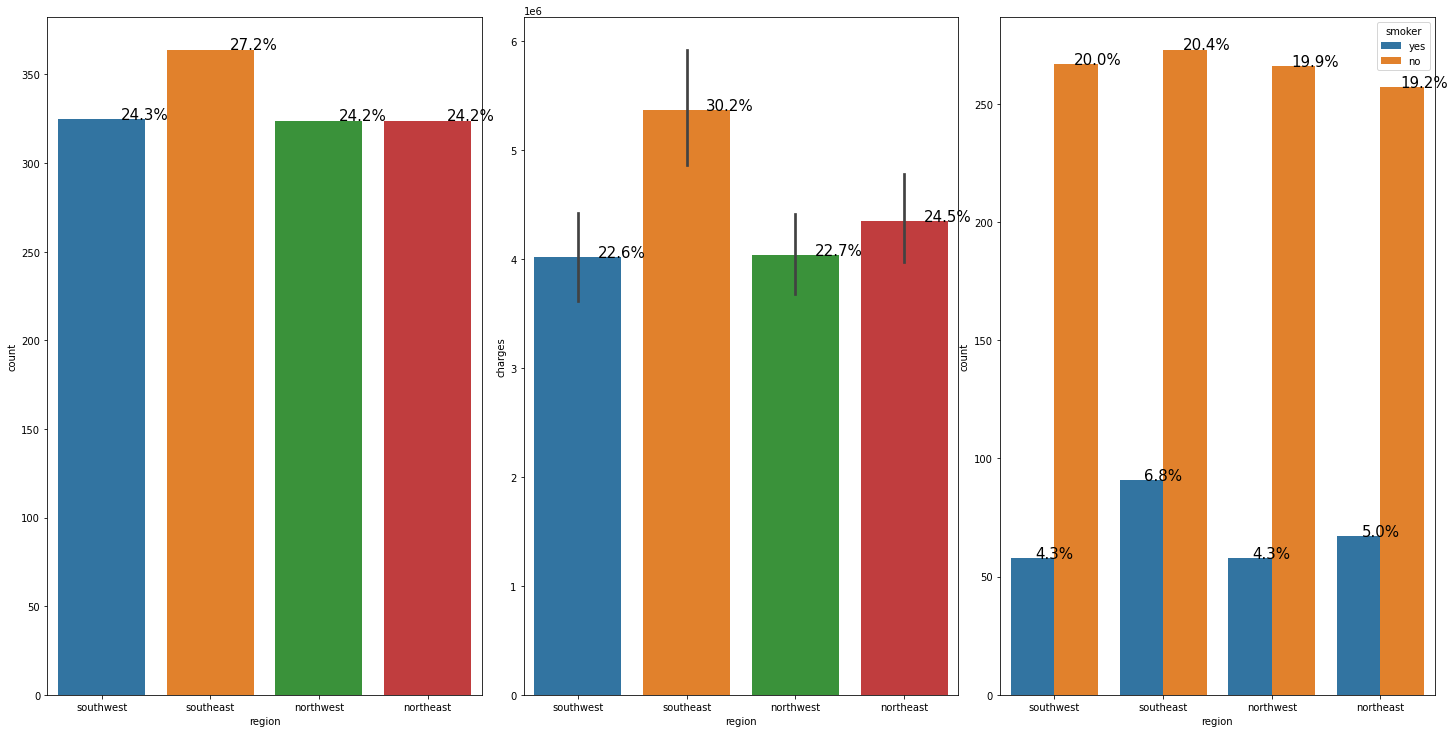

In [19]:
axis = subplots(1,3)
ax = sns.countplot(ax=axis[0], x='region', data=df)
get_count_precent(ax)
ax = sns.barplot(ax=axis[1], x='region', y='charges', data=df, estimator=sum)
get_sum_precent(ax, 'charges')
ax = sns.countplot(ax=axis[2], x='region', hue='smoker', data=df)
get_count_precent(ax)

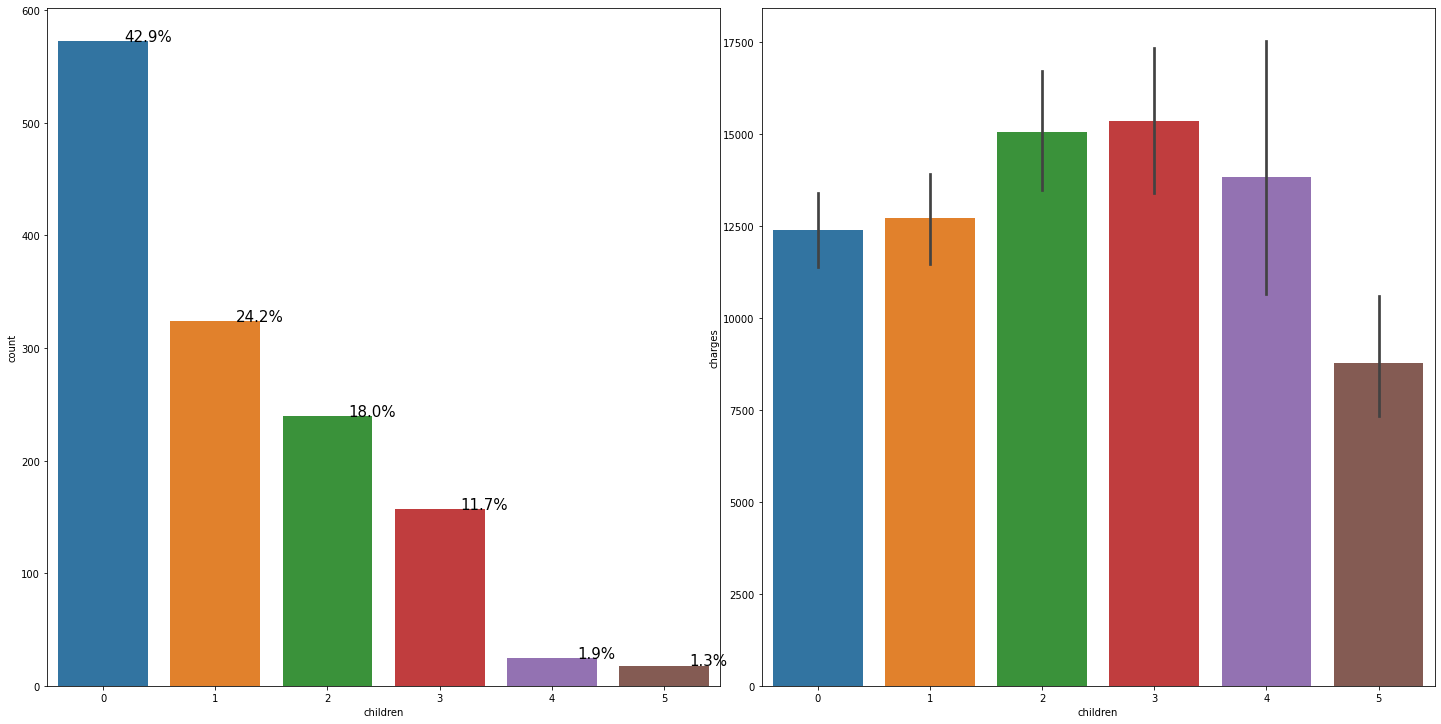

In [20]:
axis = subplots(1,2)
ax = sns.countplot(ax=axis[0], x='children', data=df)
get_count_precent(ax)
ax = sns.barplot(ax=axis[1], x='children', y='charges', data=df)

In [21]:
df_new = pd.get_dummies(df, columns=['sex', 'region', 'children', 'smoker'])


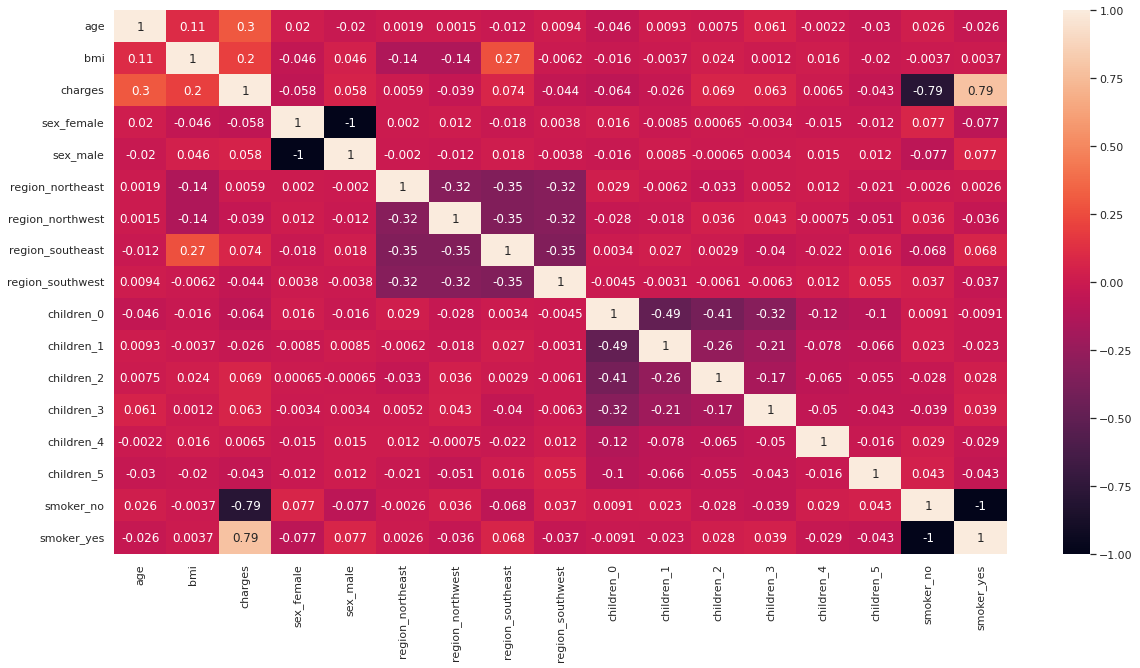

In [22]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.heatmap(df_new.corr(), annot=True);

# Data Preprocessing


In [23]:
data = df.copy()

In [24]:
# Check for data types/count non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 115.9+ KB


In [25]:
# Check for skewness min,25%,50%,75%,max
data['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [26]:
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,age,bmi,children,charges
mean,39.222139,30.663452,1.095737,13279.121487
25%,27.000000,26.290000,0.000000,4746.344000
median,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
range,46.000000,37.170000,5.000000,62648.554110


In [27]:
# Check for imbalance
data['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [28]:
# Check for imbalance
data['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [29]:
# Calculate correlation values
data_num = data.select_dtypes(include = ['float64','int64'])
corr = data_num.corr()['charges'][:-1]
top_features = corr.sort_values(ascending=False)
print("{} correlated values : \n{}".format(len(top_features),top_features))

3 correlated values : 
age         0.298308
bmi         0.198401
children    0.067389
Name: charges, dtype: float64


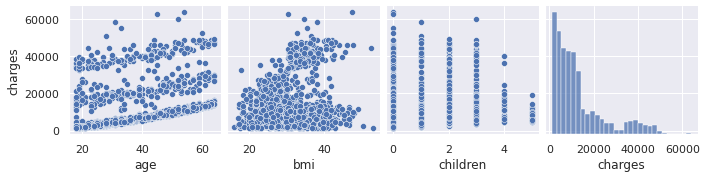

In [30]:
# Scatter plots for all numeric features
sns.pairplot(data=data_num,x_vars=data_num.columns,y_vars=['charges'])

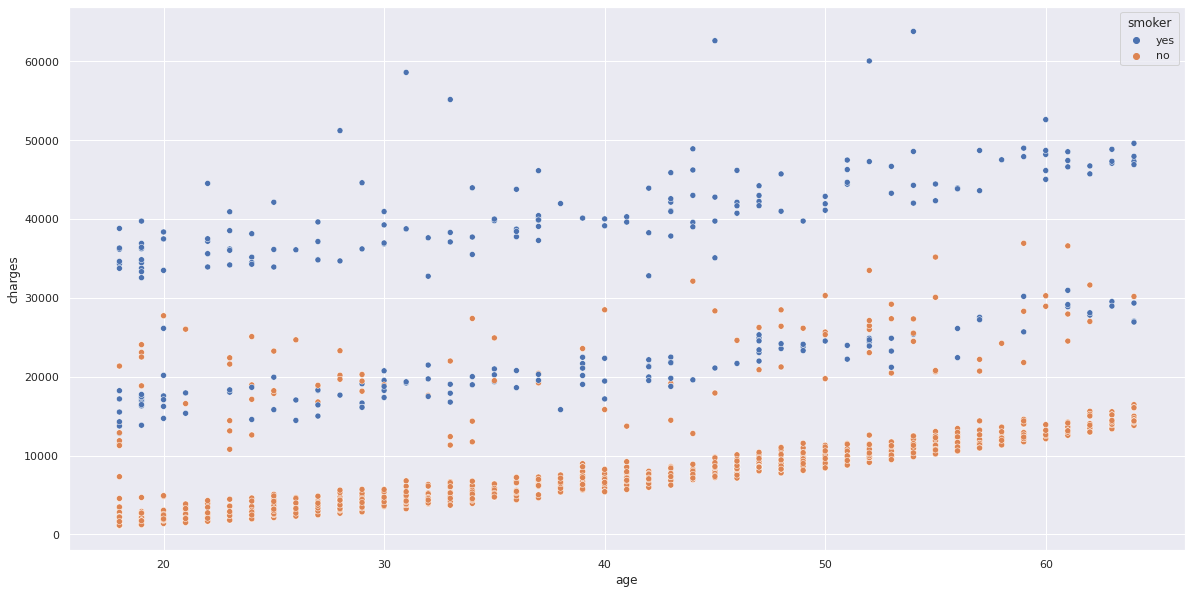

In [69]:
sns.scatterplot(x='age', y='charges', hue="smoker", data=df)

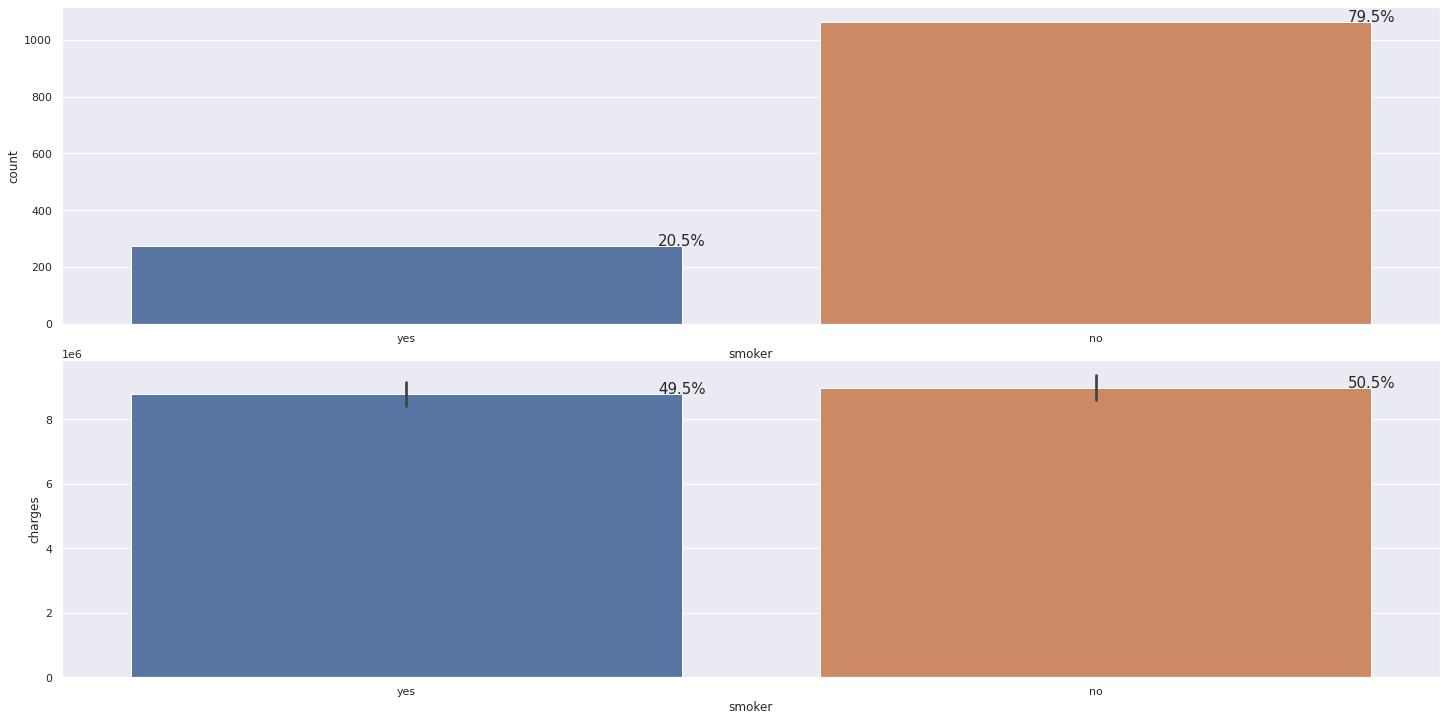

In [70]:
axis = subplots(2,1)
ax = sns.countplot(ax=axis[0],x='smoker',data=df)
get_count_precent(ax)
ax = sns.barplot(ax=axis[1],x='smoker', y='charges', data=df, estimator=sum)
get_sum_precent(ax, 'charges')

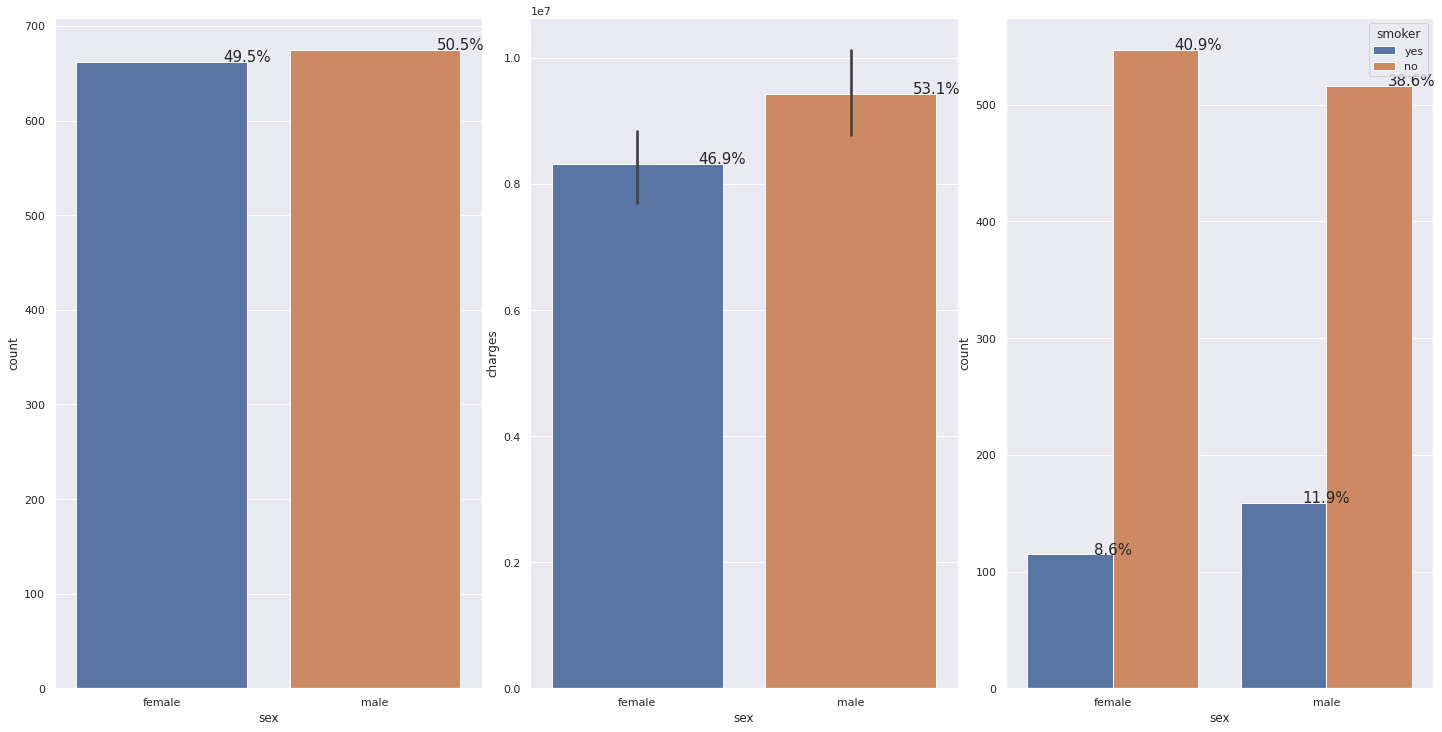

In [71]:
axis = subplots(1,3)
ax = sns.countplot(ax=axis[0], x='sex', data=df)
get_count_precent(ax)
ax = sns.barplot(ax=axis[1], x='sex', y='charges', data=df, estimator=sum)
get_sum_precent(ax, 'charges')
ax = sns.countplot(ax=axis[2], x='sex', hue='smoker', data=df)
get_count_precent(ax)

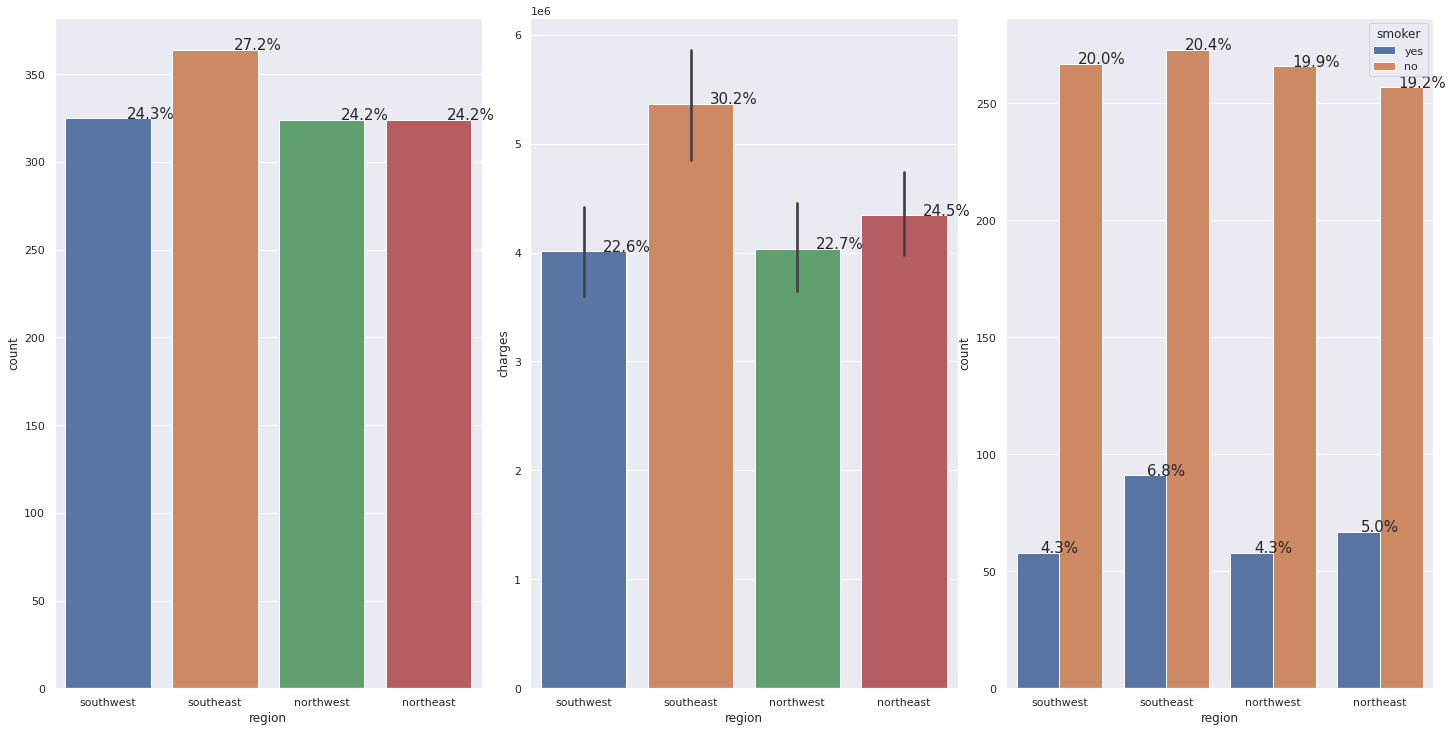

In [72]:
axis = subplots(1,3)
ax = sns.countplot(ax=axis[0], x='region', data=df)
get_count_precent(ax)
ax = sns.barplot(ax=axis[1], x='region', y='charges', data=df, estimator=sum)
get_sum_precent(ax, 'charges')
ax = sns.countplot(ax=axis[2], x='region', hue='smoker', data=df)
get_count_precent(ax)

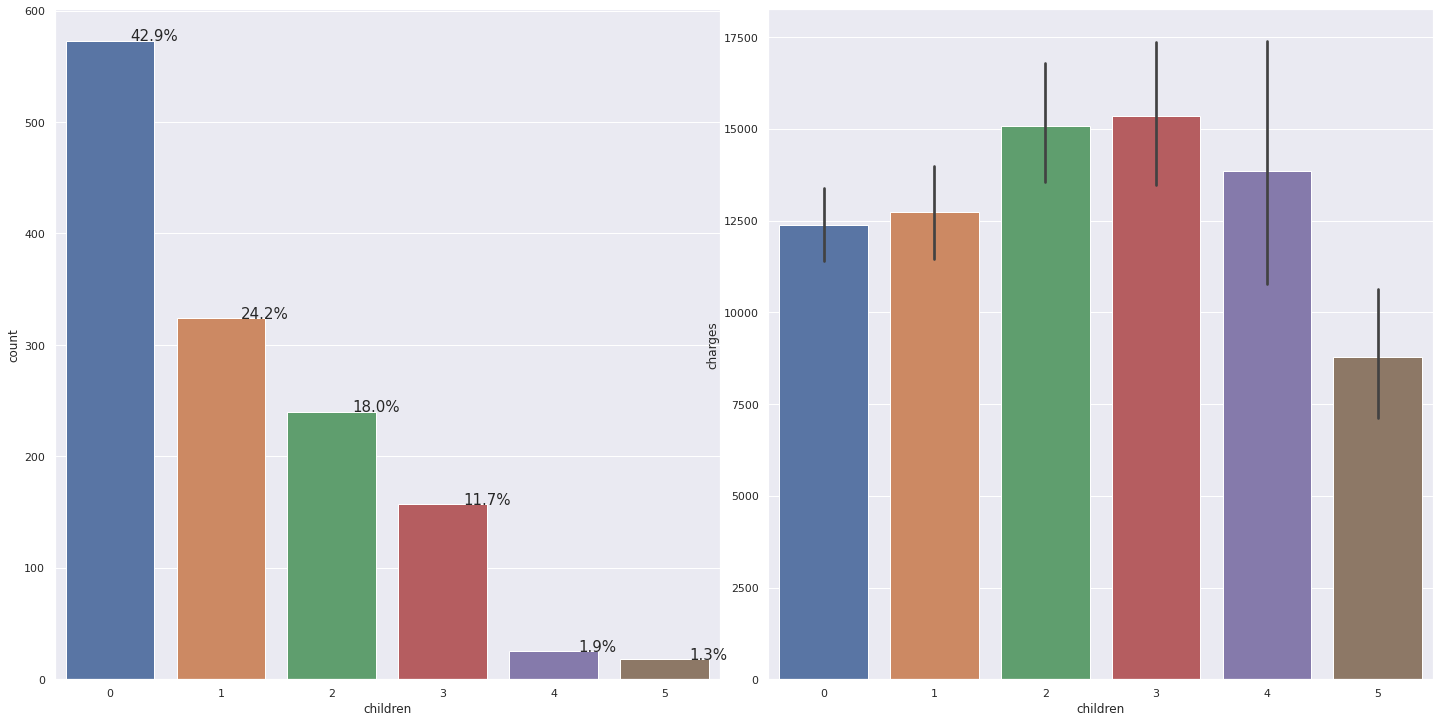

In [73]:
axis = subplots(1,2)
ax = sns.countplot(ax=axis[0], x='children', data=df)
get_count_precent(ax)
ax = sns.barplot(ax=axis[1], x='children', y='charges', data=df)

Skewnes = 1.5153909108403483


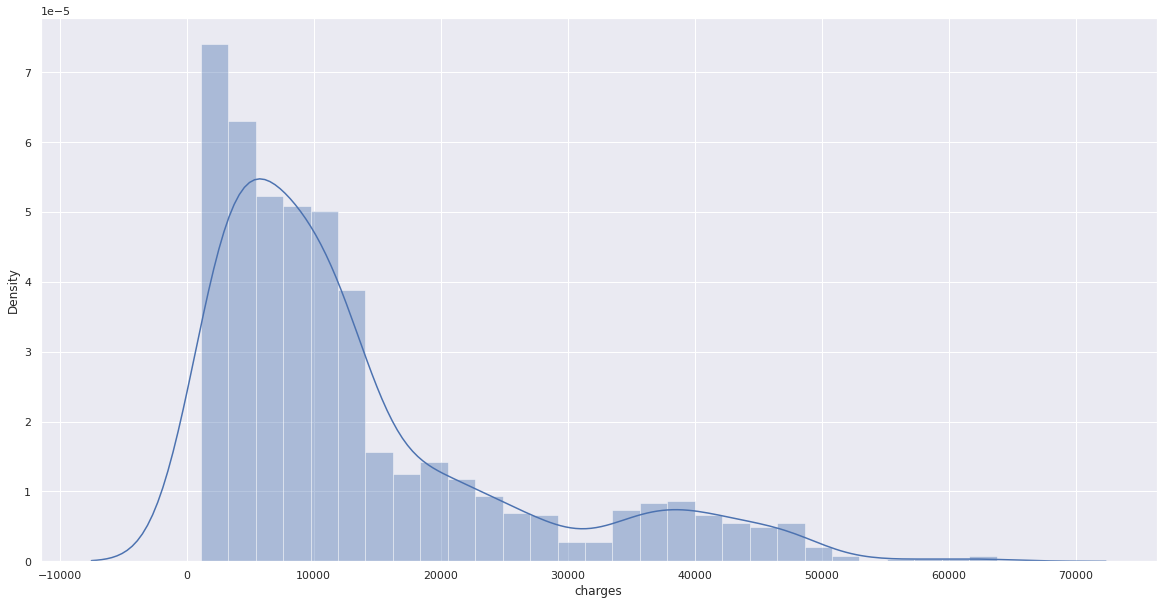

In [31]:
# Check for skewness in target column and calculate skewness
plot = sns.distplot(data['charges'])
print("Skewnes = {}".format(data['charges'].skew()))

Skewness = -0.08983863481292871


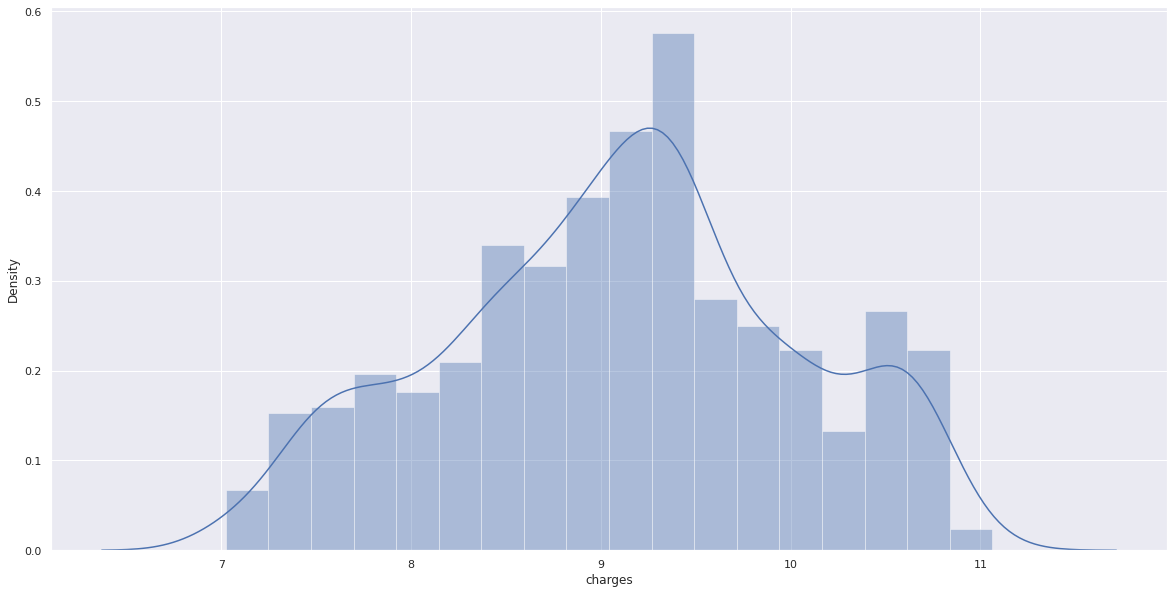

In [32]:
log_transformed = np.log(data['charges'])
sns.distplot(log_transformed);
print(f"Skewness = {log_transformed.skew()}")

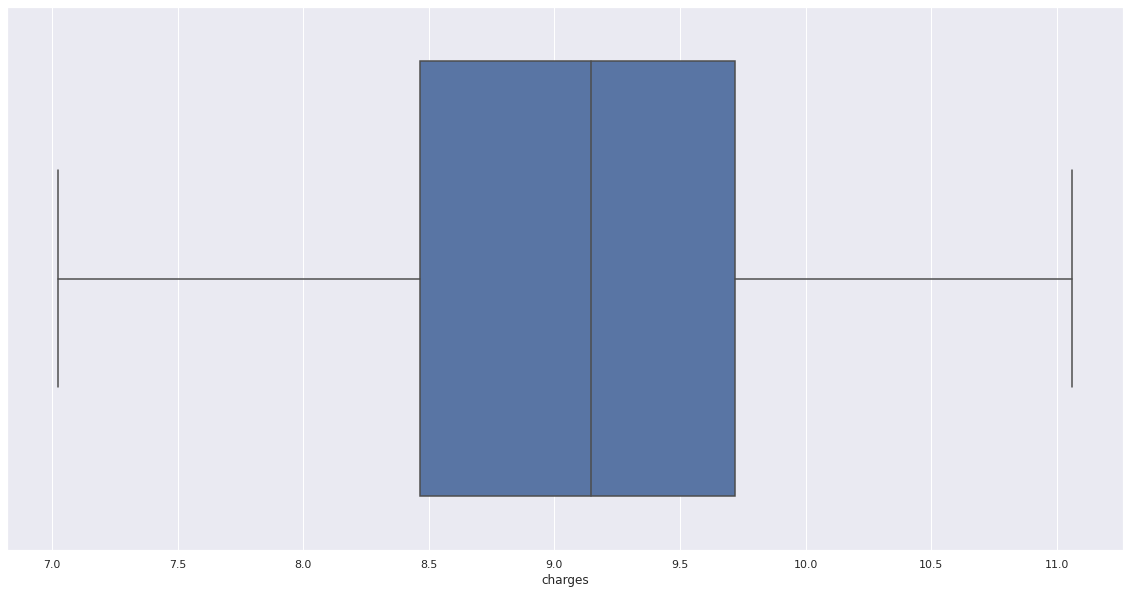

In [33]:
# Check outliers
sns.boxplot(x=log_transformed);

In [34]:
# Updating charges column
data['charges']=log_transformed

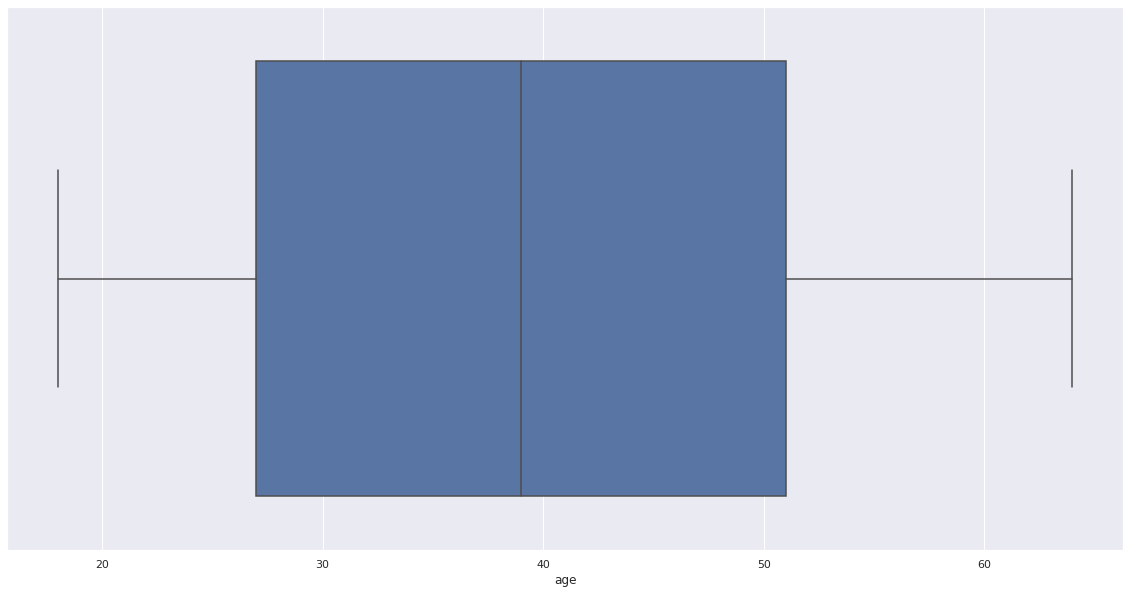

In [35]:
# Check for outliers in features
sns.boxplot(x=data['age']);

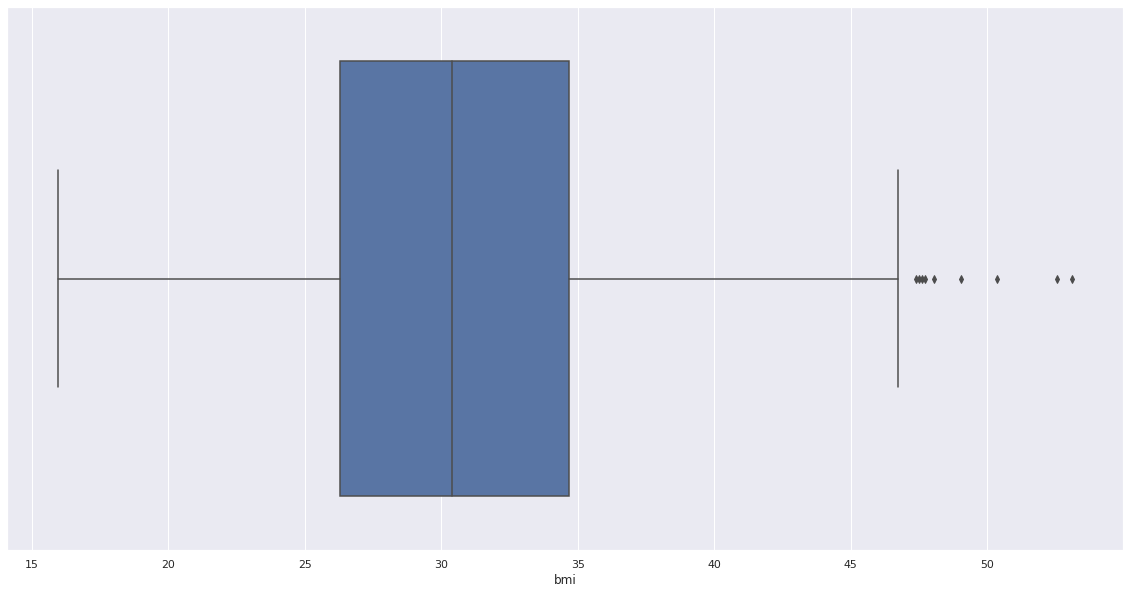

In [36]:
sns.boxplot(x=data['bmi']);


In [37]:
# Calculate correlation values after log transformation
data_num = data.select_dtypes(include = ['float64','int64'])
corr = data_num.corr()['charges'][:-1]
top_features = corr.sort_values(ascending=False)
print("{} correlated values : \n{}".format(len(top_features),top_features))

3 correlated values : 
age         0.526927
children    0.160336
bmi         0.132822
Name: charges, dtype: float64


In [38]:
# Encoding categorical data
data = pd.get_dummies(data,drop_first=True)
d2 = data.copy()
# Split into X and y
y_col = 'charges'
X = d2.drop(y_col,axis=1)
y = d2[y_col].copy()
print('X shape:',X.shape)
print('Y shape:',y.shape)

X shape: (1337, 8)
Y shape: (1337,)


In [39]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [40]:
# Splitting dataset into train and test set with 80%-20% ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size = 0.2)

In [41]:
print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}")

X_train: (1069, 8)
y_train: (1069,)
X_test: (268, 8)
y_test: (268,)


# Linear Regression


In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [43]:
r2_score(y_pred_lr, y_test)

0.6929980467904182

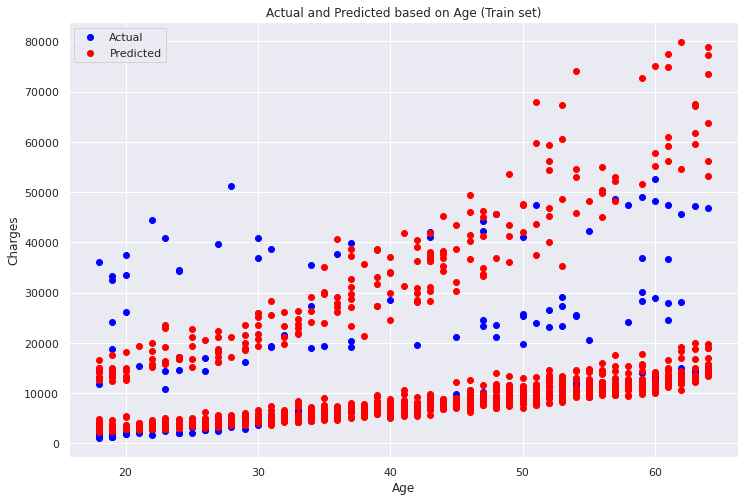

In [74]:
plt.figure(figsize=(12,8))
plt.scatter(X_test.iloc[:,0], np.exp(y_test), color = 'blue', label = "Actual")
plt.scatter(X_train.iloc[:,0], np.exp(lr.predict(X_train)), color = 'red', label = "Predicted")
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Actual and Predicted based on Age (Train set)')
legend = plt.legend()
plt.show()

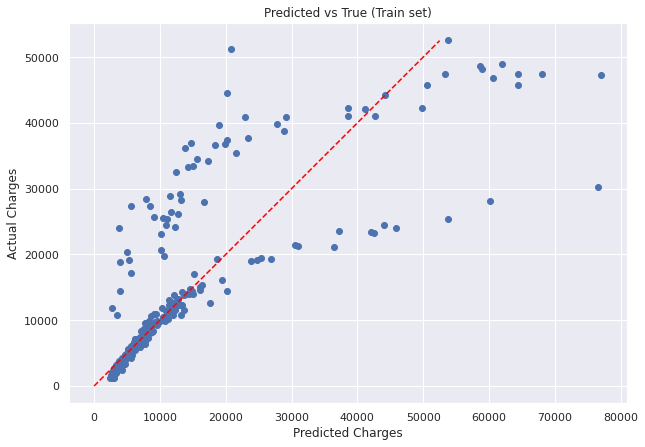

In [44]:
line = np.arange(2, np.exp(y_test).max(), 300)
plt.figure(figsize=(10,7))
plt.plot(line, line, ls='--',color='red')
plt.scatter(x=np.exp(lr.predict(X_test)), y=np.exp(y_test))
plt.xlabel('Predicted Charges')
plt.ylabel('Actual Charges')
plt.title('Predicted vs True (Train set)')
plt.show()

In [45]:
print(lr.coef_)
print(f"{lr.intercept_:.2f}")

[ 0.03420518  0.01283375  0.10102109 -0.06205747  1.55376212 -0.0744977
 -0.15370653 -0.12177798]
7.05


In [46]:
pd.DataFrame(zip(X.columns,lr.coef_))

,0,1
0,age,0.034205
1,bmi,0.012834
2,children,0.101021
3,sex_male,-0.062057
4,smoker_yes,1.553762
5,region_northwest,-0.074498
6,region_southeast,-0.153707
7,region_southwest,-0.121778


# Polynomial Regression


In [47]:
X_train_poly = X_train.copy()
X_test_poly = X_test.copy()
y_train_poly = y_train.copy()
y_test_poly = y_test.copy()

In [48]:
R2_score = []
mae = []
for i in range(1,8):
    polyreg = make_pipeline(PolynomialFeatures(i,include_bias=True),LinearRegression())
    polyreg.fit(X_train_poly,y_train_poly)
    y_pred_pr = polyreg.predict(X_test_poly)
    R2_score.append(r2_score(y_pred_pr,y_test_poly))
    mae.append(mean_absolute_error(y_pred_pr,y_test_poly))

In [49]:
print(f'this is the r2_score of test set: {R2_score}')
print(f'This is mean absolute error of the test set: {mae}')

this is the r2_score of test set: [0.6929980467904198, 0.8119501383232867, 0.8225074623444582, 0.7261198627439406, 0.6001619390890465, -0.0019114750847748496, -8.260847008445538e-06]
This is mean absolute error of the test set: [0.2931220762111363, 0.21914400568645429, 0.21408293681466836, 0.2859782492700311, 0.3661815673264226, 7.876310868828803, 122.36541748563093]


In [75]:
def draw_learning_curve(model, x, y):
    train_sizes,train_scores, test_scores = learning_curve(model, x, y,train_sizes=[50, 100, 300, 500, 700, 800,900], cv=10)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, color='blue', label='Train score')
    plt.plot(train_sizes, test_scores_mean, color='red', label='Cross-validation score')
    plt.legend(loc='best')
    plt.xlabel('Training size')
    plt.ylabel('score')

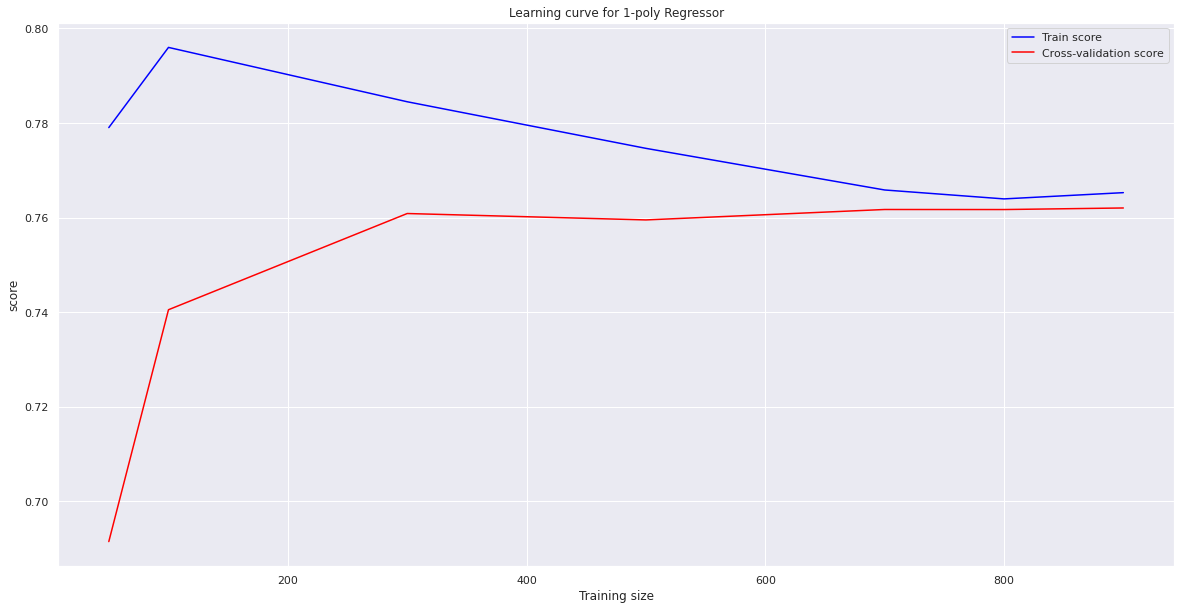

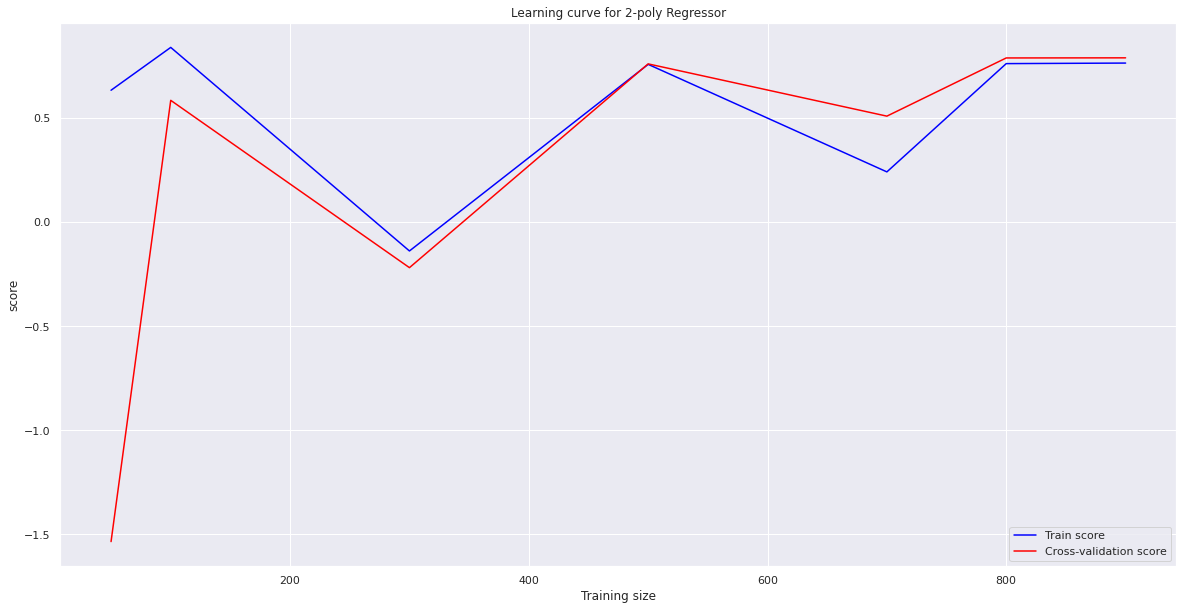

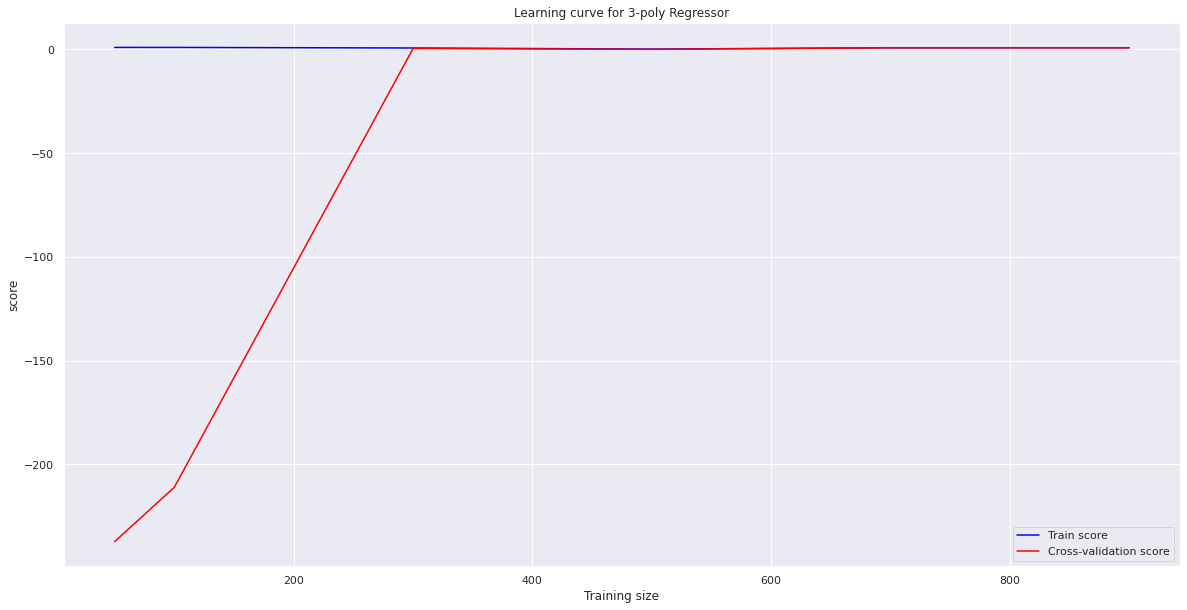

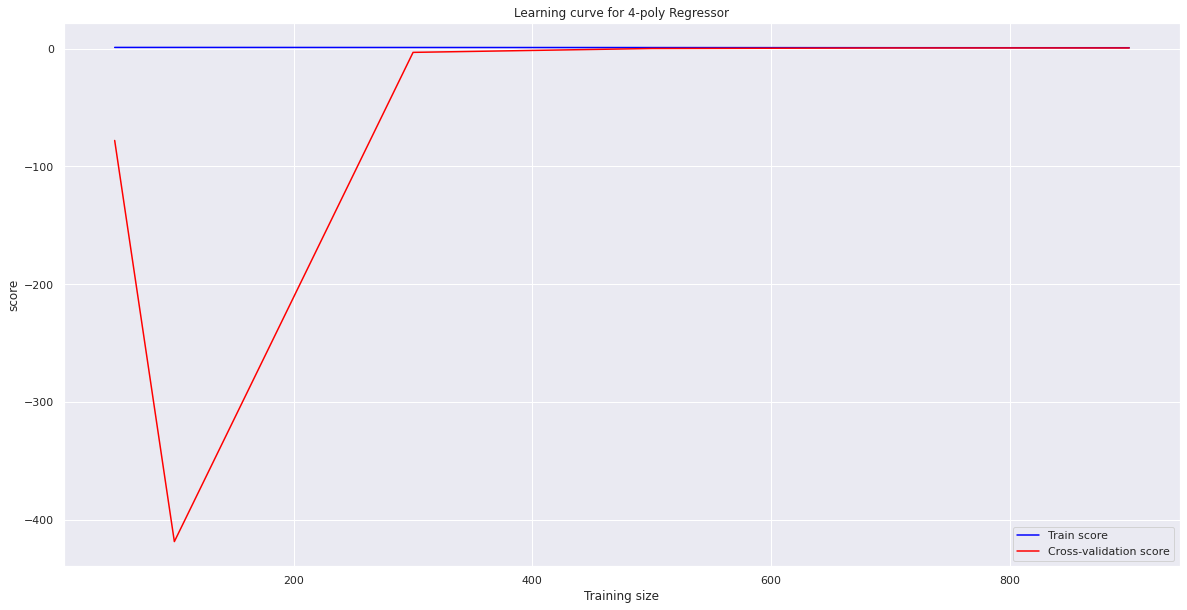

In [76]:
for i in range(1,5):
    polyreg=make_pipeline(PolynomialFeatures(i,include_bias=True),LinearRegression())
    draw_learning_curve(polyreg,X_train_poly, y_train_poly)
    plt.title(f"Learning curve for {i}-poly Regressor")
    plt.show()

R2 Score is:  0.8225074623444582
Mean Absolute Error:  0.21408293681466836


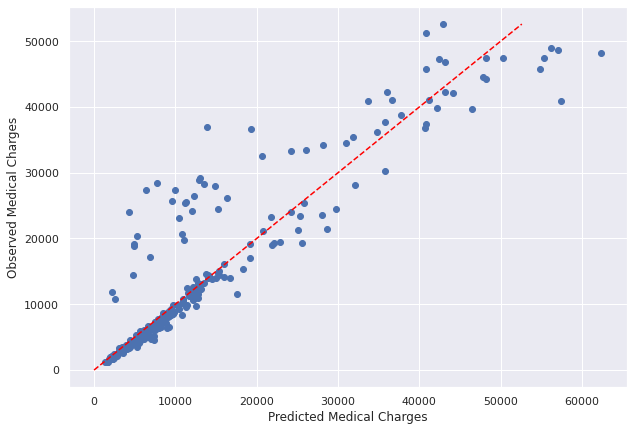

In [50]:
polyreg = make_pipeline(PolynomialFeatures(degree=3,include_bias=True),LinearRegression())
polyreg.fit(X_train_poly,y_train_poly)
y_pred_pr = polyreg.predict(X_test_poly)
r2_score = r2_score(y_pred_pr,y_test_poly)
mean_absolute_error = mean_absolute_error(y_pred_pr,y_test_poly)
print("R2 Score is: ",r2_score)
print("Mean Absolute Error: ", mean_absolute_error)
plt.figure(figsize=(10,7))
plt.scatter(np.exp(y_pred_pr),np.exp(y_test_poly))
plt.xlabel("Predicted Medical Charges") 
line = np.linspace(2,np.exp(y_test_poly).max(),500)
plt.plot(line,line,ls='--',color='red')
plt.ylabel("Observed Medical Charges")
plt.show()

# Lasso Regression


In [51]:
estimator_las = Pipeline([("polynomial_features",PolynomialFeatures()),
                      ("scaler",StandardScaler()),
                      ("las_regression",Lasso(max_iter=10**5))])

params_las = {'polynomial_features__degree':range(4,8),
            'las_regression__alpha':np.geomspace(0.05,0.1,5)}

kf = KFold(shuffle=True,random_state=42,n_splits=3)

In [52]:
grid_las = GridSearchCV(estimator_las,params_las,cv=kf)
grid_las.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('las_regression',
                                        Lasso(max_iter=100000))]),
             param_grid={'las_regression__alpha': array([0.05      , 0.05946036, 0.07071068, 0.08408964, 0.1       ]),
                         'polynomial_features__degree': range(4, 8)})

In [53]:
grid_las.best_params_

{'las_regression__alpha': 0.05, 'polynomial_features__degree': 6}

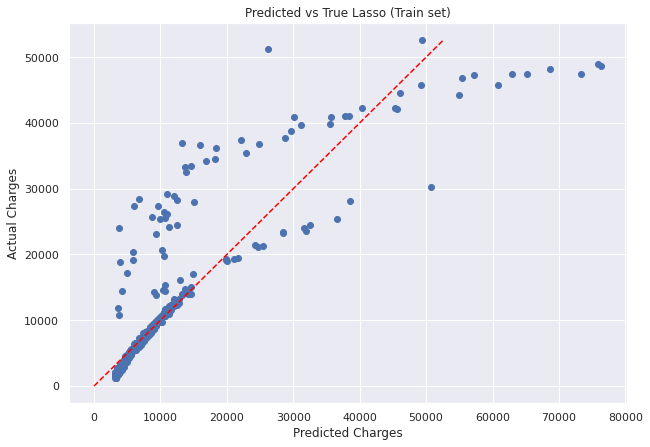

In [54]:
y_pred_las = grid_las.predict(X_test)
line = np.linspace(2, np.exp(y_test).max(), 500)
plt.figure(figsize=(10,7))
plt.plot(line, line, ls='--',color='red')
plt.scatter(x=np.exp(y_pred_las), y=np.exp(y_test))
plt.xlabel('Predicted Charges')
plt.ylabel('Actual Charges')
plt.title('Predicted vs True Lasso (Train set)')
plt.show()

# Ridge Regression


In [55]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.model_selection import GridSearchCV

kf = KFold(shuffle=True,random_state=42,n_splits=3)
parameters = {'alpha':[0.1,1,5, 10]}

Ridge_reg= GridSearchCV(Ridge(), parameters,cv=kf)

#fit the grid search
Ridge_reg.fit(X_train,y_train)

# best estimator
print(Ridge_reg.best_estimator_)

# best model
Ridge_reg = Ridge_reg.best_estimator_
Ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.1)


Ridge(alpha=0.1)

In [56]:
Ridge_reg.score(X_test,y_test)


0.7716369032732711

In [57]:
y_pred_ridge = Ridge_reg.predict(X_test)


In [58]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred_ridge) 

0.2931191986351383

In [59]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred_ridge)

0.20539339899337153

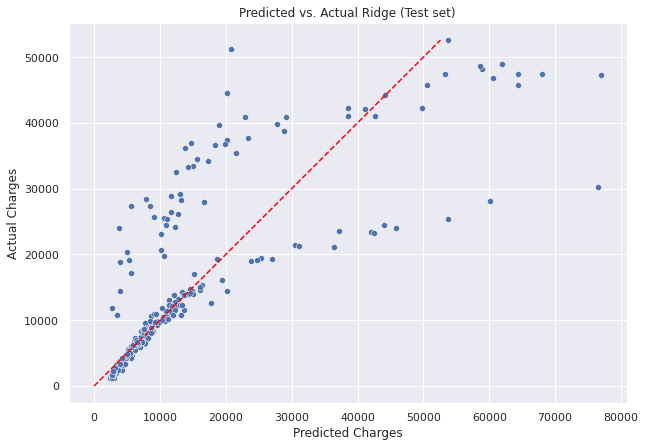

In [60]:
plt.figure(figsize=(10,7));
sns.scatterplot(np.exp(y_pred_ridge),np.exp(y_test));
plt.xlabel('Predicted Charges')
plt.ylabel('Actual Charges')
plt.title('Predicted vs. Actual Ridge (Test set)')
l = np.linspace(0,np.exp(y_test).max(),500);
plt.plot(l,l,ls='--',color='red');

# ElasticNet Regression


In [61]:

from sklearn.linear_model import ElasticNet
kf = KFold(shuffle=True,random_state=42,n_splits=3)
estimator_elas = Pipeline([("polynomial_features",PolynomialFeatures()),
                          ("scaler",StandardScaler()),
                          ("elas_regression",ElasticNet(max_iter=100000))])
params_elas = {'polynomial_features__degree':[x for x in range(1,6)],
              'elas_regression__alpha':np.geomspace(0.05,1,5),
              'elas_regression__l1_ratio':np.geomspace(0.05,1,5)}

In [62]:
grid_elas = GridSearchCV(estimator_elas,params_elas,cv=kf)
grid_elas.fit(X_train,y_train);
y_pred_elas = grid_elas.predict(X_test)

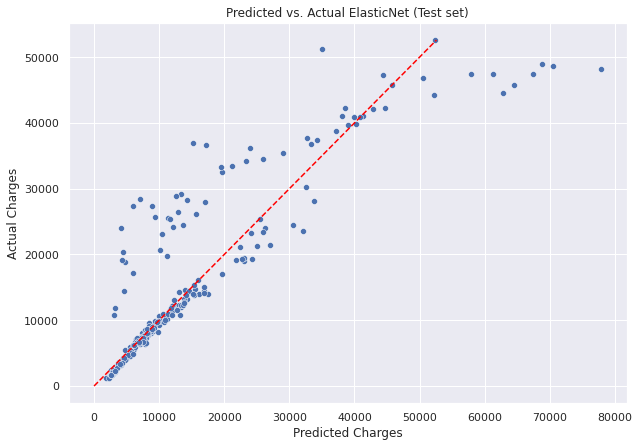

In [63]:
plt.figure(figsize=(10,7))
sns.scatterplot(np.exp(y_pred_elas),np.exp(y_test));
plt.xlabel('Predicted Charges')
plt.ylabel('Actual Charges')
plt.title('Predicted vs. Actual ElasticNet (Test set)')
l = np.linspace(0,np.exp(y_test).max(),500);
plt.plot(l,l,ls='--',color='red');

In [64]:
grid_elas.best_params_

{'elas_regression__alpha': 0.05,
 'elas_regression__l1_ratio': 0.05,
 'polynomial_features__degree': 3}

In [65]:
print('Sum of Magnitude of coef: ',(abs(grid_elas.best_estimator_.named_steps['elas_regression'].coef_)).sum())
print('Number of coef=0 : ',(grid_elas.best_estimator_.named_steps['elas_regression'].coef_==0).sum())

Sum of Magnitude of coef:  2.901329748061901
Number of coef=0 :  71


# Comparison

In [77]:
from sklearn.metrics import mean_squared_error,r2_score
def rmse(y_pred,y_test):
  return np.sqrt(mean_squared_error(y_pred,y_test))

In [78]:
print('-=Simple Linear Regression=-')
print('R2 score: ',r2_score(y_pred_lr,y_test))
print('RMSE: ',rmse(y_pred_lr,y_test))

-=Simple Linear Regression=-
R2 score:  0.6929980467904182
RMSE:  0.4532026896935328


In [79]:
print('-=Polynomial Regression=-')
print('R2 score: ',r2_score(y_pred_pr,y_test))
print('RMSE: ',rmse(y_pred_pr,y_test))

-=Polynomial Regression=-
R2 score:  0.8225074623444582
RMSE:  0.36293186648018944


In [80]:
print('-=Lasso Regression=-')
print('R2 score: ',r2_score(y_pred_las,y_test))
print('RMSE: ',rmse(y_pred_las,y_test))

-=Lasso Regression=-
R2 score:  0.6512891844053807
RMSE:  0.4515202559803745


In [81]:
print('-=Ridge Regression=-')
print('R2 score: ',r2_score(y_pred_ridge,y_test))
print('RMSE: ',rmse(y_pred_ridge,y_test))

-=Ridge Regression=-
R2 score:  0.6927712590218715
RMSE:  0.45320348519552617


In [82]:
print('-=ElasticNet Regression=-')
print('R2 score: ',r2_score(y_pred_elas,y_test))
print('RMSE: ',rmse(y_pred_elas,y_test))

-=ElasticNet Regression=-
R2 score:  0.7933198726832693
RMSE:  0.3807198499763539
